# Voorbeelden team Euler

Hierin komen per procedure uit `procedures.py` enkele illustratieve voorbeelden met wat toelichting. Ook procedures die nog niet werken horen hier thuis, aangezien we dan met een voorbeeld het probleem kunnen aantonen.

Per hoofding kan je een tussentitel aanmaken door in een markdown-cel `###Tussentitel` te typen. De naam van de functie kan dan tussen `` worden gezet.

In [1]:
from procedures import *
import matplotlib.pyplot as plt

### De procedure `xsample(n,a,b)`

Deze functie genereert een vector (ndarray) van lengte n met uniform verdeelde getallen tussen a en b.

In [2]:
# creëer een vector met 30 x-waarden tussen 0 en 20
xVector = xsample(30,0,20)

print(xVector)

[11.66093788  1.49009149  1.07316465 11.60878922 19.12911659  2.85959611
  6.29915905  2.23647758 15.25136348 13.10481907 12.21944334 17.30671661
 19.45031912 14.64778369  8.53504576 13.47386272  8.94346122  4.59172351
  9.83353676  9.48839324 11.4901722  10.0267323   3.41203949  9.82987025
 14.79578125 18.40546215 15.6464342   6.53731546 15.91932297 14.42101455]


### De procedure `ysample(x,f,e)`

Deze functie genereert een vector (ndarray) van dezelfde lengte als vector x volgens de formule `y=f(x)+r` met r normaal verdeelde getallen met gemiddelde nul en standaarddeviatie e.

In [3]:
# een parabolische functie ter illustratie
# we gaan ons op deze functie baseren om de datapunten te genereren
# vervolgens gaan we aan de functiewaarden een error-term toevoegen
def f(x):
    return x**2

# creëer een vector met 20 y-waarden zodat bij de functiewaarden van de parabolische functie een error-term epsilon wordt toegevoegd
# deze epsilon-term is een random getal tussen -e en e en de error-termen hebben een gemiddelde van 0
# hoe groter de epsilon (e), hoe groter de spreidin/afwijking van de punten rond de parabool
# de gemiddelde afstand van alle punten tot de parabool blijft echter 0
yVector = ysample(xVector, f, e=30)

print(yVector)

[150.86723149  35.08883668  -6.36170598 142.95475538 385.53945989
   1.76850925  59.381983    15.69674474 260.87732242 168.00524164
 101.34774572 282.19182271 376.60896793 180.81837876  99.15989747
 192.22658051 110.66816704  13.52811646 107.54837373  90.57455175
 130.11809303 171.43871314 -12.63592649  59.33618273 289.0113445
 339.81820574 279.08244836  80.95286404 201.10093894 276.14413436]


### De procedure `ols(y,x)`

Deze functie berekent de Ordinary Least Squares (OLS) regressierechte bij gegeven vectoren y en x. De functie geeft een koppel (a,b) terug zodat `y = a*x + b` de regressierechte is. Hierbij komt a overeen met β_1 en b met β_0 (zie pagina 71 van ISL, waar `y = β_1*x + β_0`).

In [4]:
# genereer een koppel (a,b)
# dit komt eigenlijk overeen met een koppel (beta1, beta0)
(a,b) = ols(yVector, xVector)

# print de helling en de intercept op 3 decimalen nauwkeurig
print("%.3f is de helling van de OLS regressielijn (a = beta1)" % a)
print("%.3f is de intercept van de OLS regressielijn (b = beta0)" % b, end="\n\n")

# de functie f^ (f met een hoedje)
def geschatteFunctie(x):
    return a*x + b

# druk het voorschrift van onze geschatte functie af
import sympy as sp
x = sp.symbols('x')
print(f"Functievoorschrift schattingsfunctie:\t\t\t{geschatteFunctie(x)}")

# schat de functiewaarde van x=4 en x=15 op basis van onze geschatte functie
print(f"Voorspelde functiewaarde voor x=2 via OLS regressie:\t{geschatteFunctie(4)}")
print(f"Voorspelde functiewaarde voor x=10 via OLS regressie:\t{geschatteFunctie(15)}")

20.156 is de helling van de OLS regressielijn (a = beta1)
-64.708 is de intercept van de OLS regressielijn (b = beta0)

Functievoorschrift schattingsfunctie:			20.1555252864272*x - 64.7080866679948
Voorspelde functiewaarde voor x=2 via OLS regressie:	15.91401447771409
Voorspelde functiewaarde voor x=10 via OLS regressie:	237.62479262841342


### De procedure `knn(x0,y,x,k)`

Deze functie berekent de voorspelling(en) in x0 volgens KNN-regressie bij gegeven regressor x en respons y (ndarray).

In [5]:
# We voorspellen de y-waarden in de punten x=4 en x=10 op basis van de 3 dichtste buren.
voorspeldeFunctiewaardenKnn = knn(np.array([4,10]),yVector,xVector,3)
print(f"Voorspelde functiewaarden voor x=4 en x=10 via KNN: {voorspeldeFunctiewaardenKnn}")

Voorspelde functiewaarden voor x=4 en x=10 via KNN: [  0.88689974 112.7744232 ]


### Tussentijdse visualisatie

Hieronder een visuele voorstelling van de resultaten in bovenstaande functies:

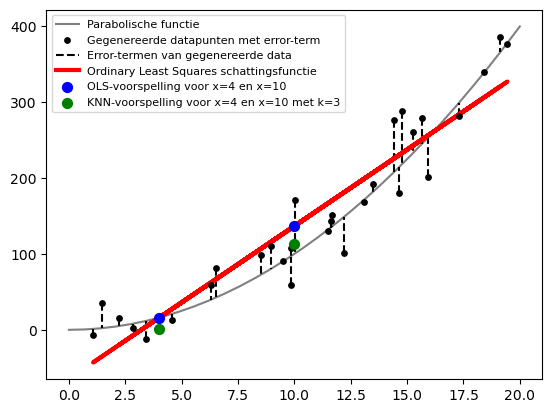

In [6]:
import numpy as np
plt.figure()
plt.plot(np.linspace(0, 20, 30), f(np.linspace(0, 20, 30)), color='grey', label="Parabolische functie")
plt.scatter(xVector, yVector, c='k', s=15, label="Gegenereerde datapunten met error-term", zorder=3)
plt.vlines(xVector, yVector, f(xVector), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt.plot(xVector, geschatteFunctie(xVector),'r-', lw=3 ,label="Ordinary Least Squares schattingsfunctie")
plt.scatter([4,10],[geschatteFunctie(4),geschatteFunctie(10)], c='blue', label="OLS-voorspelling voor x=4 en x=10", s=50,zorder=5)
plt.scatter([4,10],voorspeldeFunctiewaardenKnn, c='green', label="KNN-voorspelling voor x=4 en x=10 met k=3", s=50,zorder=5)
plt.legend(fontsize="8")
plt.show()

### De procedure `mls(y,X)`

Deze functie genereert een vector beta zodat `y=X*beta` het kleinste kwadratenhypervlak is bij gegeven matrix X en responsvector Y (ndarray).

De functie werkt nog niet helemaal goed.

In [7]:
# x_i1
xVector1 = xsample(20,0,1)
# x_i2
xVector2 = xsample(20,0,1)
# x_i1 + x_i2
som = xVector1+xVector2

def f(x):
    return x

yVector = ysample(som,f)
xMatrix = np.array([xVector1,xVector2])

beta = mls(yVector,xMatrix)
print(beta)

ValueError: operands could not be broadcast together with shapes (20,2) (20,) 